<font face="Arial" size=6 color=#0099ff> 0. Importing packages </font>

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. Organize packages in order (system and io packages, basic packages, statistics packages, plot packages, other packages.)
2. ALWAYS add and revise on the same template and put it into Dash snippets. 

<font face="Arial" size=5 color=#DC143C> why: </font>
1. easy to manage packages in the enviroment (clear overview of what are in the running enviroment)
2. make your code tidy 

In [157]:
# system and io packages
# python2.7
import sys
import cPickle as pickle

#Basic packages
import pandas as pd
import numpy as np

#statistics packages
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
%load_ext rpy2.ipython
from rpy2.robjects import r, pandas2ri

#plot packages
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot,iplot_mpl
from plotly.graph_objs import *
import cufflinks as cf
init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



# other packages
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<font face="Arial" size=6 color=#0099ff> 1.Import and combine Edata and basic demography data（age,gender...)
</font> 
<font face="Arial" size=5 color=#DC143C> tips: </font>
1. load and save data by using read_csv() and to_csv() 
2. merge table by using df1.set_index(’Subject’).join(df2.set_index(’Subject’)) by index, also can use 'on=column name' 
3. setting 'Subject ID' as index is convenient 
4. after manipulating data (e.g. join, merge, groupby), ALWAYS check the resulting tables by using df.describe() and head()

 **Import behavioral data(excel version of Edata)**

In [158]:
# read excel version of Edata, pandas.read_excel
#pd.read_csv('name.csv')
se_all = pd.read_excel('SE_all.xlsx')
#se_all = pd.read_excel('SE_all_demo1118.xlsx')
raw_data = se_all

In [159]:
#atb_list = ['ExperimentName','Subject','Block','answer.ACC','answer.CRESP',  
#            'Trigger.OnsetTime','answer.OnsetTime','answer.RESP','answer.RT',  
#            'answer.RTTime','answer1','answer2','answer3','answer4','condition',
#            'FA','repot.RESP','repot.RT','repot.RTTime','rightA',  
#            'run','sen','sen_no','word']

In [160]:
#set_index, rename, join
data = raw_data.set_index(['Subject'])
# replace wrong named data including {63:20,99:11,152:15,217:17}
replaced_pairs = {63:20,99:11,152:15,217:17}
data = data.rename(replaced_pairs, axis='index')
se_basic_infor = pd.read_excel('SE_basic_infor.xlsx')
#se_basic_infor = pd.read_excel('SE_basic_infor_demo1118.xlsx')
se_basic_infor = se_basic_infor.set_index('Subject')
data = data.join(se_basic_infor) #
data.describe()

,Session,Display.RefreshRate,Group,RandomSeed,Trigger.ACC,Trigger.CRESP,Trigger.DurationError,Trigger.OnsetDelay,Trigger.OnsetTime,Trigger.OnsetToOnsetTime,...,word.DurationError,word.OnsetDelay,word.OnsetTime,word.OnsetToOnsetTime,word.RESP,word.RT,word.RTTime,LSHS_total,LSHS_AVH,age
count,7260.000000,7260.000000,7260.0,7.260000e+03,7260.0,0.0,7260.0,7260.000000,7260.000000,7260.0,...,7260.000000,7260.000000,7260.000000,7260.000000,8.000000,7260.000000,7260.000000,7140.000000,7140.000000,7140.000000
mean,1.652893,60.005202,1.0,2.499947e+07,0.0,NaN,-999999.0,26.661157,16753.004132,0.0,...,-1101.927273,89.835813,232080.512672,1015.441322,1.625000,0.527135,330.857163,29.882353,15.344538,22.092437
std,1.525162,0.001019,0.0,1.227314e+09,0.0,NaN,0.0,5.501774,7650.431445,0.0,...,33179.264024,16.212675,121665.874701,33.732451,0.517549,19.343701,10316.665445,9.778190,5.844946,2.570180
min,1.000000,60.002000,1.0,-2.120252e+09,0.0,NaN,-999999.0,13.000000,4569.000000,0.0,...,-999999.000000,65.000000,19724.000000,0.000000,1.000000,0.000000,0.000000,12.000000,7.000000,17.000000
25%,1.000000,60.005000,1.0,-1.011328e+09,0.0,NaN,-999999.0,22.000000,11051.000000,0.0,...,0.000000,83.000000,129600.250000,1016.000000,1.000000,0.000000,0.000000,22.000000,10.000000,20.000000
50%,1.000000,60.005000,1.0,4.566445e+07,0.0,NaN,-999999.0,27.000000,15867.000000,0.0,...,0.000000,83.000000,228751.000000,1017.000000,2.000000,0.000000,0.000000,29.000000,14.000000,22.000000
75%,2.000000,60.005000,1.0,1.180830e+09,0.0,NaN,-999999.0,31.000000,20526.000000,0.0,...,0.000000,100.000000,332524.750000,1017.000000,2.000000,0.000000,0.000000,38.000000,20.000000,24.000000
max,22.000000,60.019000,1.0,2.133116e+09,0.0,NaN,-999999.0,39.000000,62952.000000,0.0,...,0.000000,200.000000,928575.000000,1017.000000,2.000000,975.000000,403770.000000,49.000000,27.000000,29.000000


Suject 24(absent),53(not follow the instruction),99,152,217 not clear what is the issue

<font face="Arial" size=6 color=#0099ff>  2. Check response data (RT and response) for all the trials from each subject </font>

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. before average RTs cross trials, look into the distribution (pattern) of trial-trial RTs. detect outliers and address them properly (subject 52)
2. use @interact from ipywidgets to check the histogram interactively. 

In [161]:
#I think that we should not remove acc very low, maybe false alarm very high.
#52, 53, 54, 56 for pre, 
# for unp 3, 11, 14, 15, 17, 18, 19, 20, 21, 23, 25, 26, 31, 32, 33, 36, 39,
#            40, 41, 42, 44, 45, 47, 50, 52, 54, 56, 57, 58, 60, 61, 62
# opt['acc_pre'] = bd_pre['answer.ACC'].mean(level='Subject')
# opt[opt['acc_unp']<0.25].index 
# opt['fa_unp']/60
#sub42(30 zeros)，44(60 zeros)，52(90 and more zeros)
@interact(index_name=data.index.unique())
def iplot_scale(index_name):
    df = data[data.index==index_name]['answer.RT']
    iplot(df.iplot(asFigure=True,kind='histogram', bins = 20,subplots=True, shape=(1, 1), filename='histogram-subplots'))

interactive(children=(Dropdown(description=u'index_name', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62), value=1), Output()), _dom_classes=('widget-interact',))


<font face="Arial" size=6 color=#0099ff>  3. Average RT and ACC for each subject. </font>

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. df[df['column_name']] to select column
2. df.mean(level='Sujbect') to average rt for each subject cross trials. df.fun() (sum, std, sqrt...)to manipulate the data. 
3. pd.concat((df1,df2),axis=1) to concat RT, ACC, False alarm and other variables into one table. 

In [162]:
#to check RT distribution for each subject and detect outliers
opt =  pd.DataFrame()
bd_pre =  data[data['condition']=='pre']
bd_unp =  data[data['condition']=='unp']
# rt is zero in some trials, exluding them.

opt['acc_pre'] = bd_pre['answer.ACC'].mean(level='Subject')
opt['acc_unp'] = bd_unp['answer.ACC'].mean(level='Subject')


# only for all RIGHT response 
opt['conf_pre'] = bd_pre[bd_pre['answer.ACC']==1]['answer.RESP'].mean(level='Subject')
opt['conf_unp'] = bd_unp[bd_unp['answer.ACC']==1]['answer.RESP'].mean(level='Subject')

# only for all RIGHT response 
#opt['conf_pre'] = bd_pre['answer.RESP'].mean(level='Subject')
#opt['conf_unp'] = bd_unp['answer.RESP'].mean(level='Subject')


opt['rt_pre'] = bd_pre[bd_pre['answer.ACC']==1]['answer.RT'].mean(level='Subject') #
opt['rt_unp'] = bd_unp[bd_unp['answer.ACC']==1]['answer.RT'].mean(level='Subject') #[bd_unp['answer.ACC']==1]
#opt['rt_sd_pre'] = bd_pre[bd_pre['answer.ACC']==1]['answer.RT'].std(level='Subject')
#opt['rt_sd_unp'] = bd_unp[bd_unp['answer.ACC']==1]['answer.RT'].std(level='Subject')

# add false alarm rate
bd_unp_ans_fa = bd_unp[bd_unp['answer.RESP']==bd_unp['FA']][['answer.RESP']]
bd_unp_ans_fa['count_num'] = 1
opt['fa_unp'] = bd_unp_ans_fa['count_num'].sum(level='Subject')
opt['fa_pre'] = 0

#concat different condtions and different measurements. 

acc = pd.concat((opt['acc_pre'],opt['acc_unp']),axis = 0)  
conf = pd.concat((opt['conf_pre'],opt['conf_unp']),axis = 0)                  
rt = pd.concat((opt['rt_pre'],opt['rt_unp']),axis = 0) 
fa = pd.concat((opt['fa_pre'],opt['fa_unp']),axis = 0) 
opt_all = pd.concat((acc,rt,fa,conf),axis=1)
opt_all = opt_all.rename({0:'acc',1:'rt',2:'fa',3:'conf'},axis = 'columns')


In [164]:
opt_all['condition'] = ['pre']*61+['unp']*61
#opt_all['condition'] = ['pre']*4+['unp']*4
opt_all = opt_all.join(se_basic_infor)
opt_all.describe()

,acc,rt,fa,conf,LSHS_total,LSHS_AVH,age
count,122.000000,122.000000,122.000000,122.000000,120.000000,120.000000,120.000000
mean,0.478005,1274.006684,11.663934,2.458731,29.883333,15.333333,22.100000
std,0.284254,200.631342,14.944863,0.390094,9.777511,5.845825,2.571335
min,0.016667,564.714286,0.000000,1.000000,12.000000,7.000000,17.000000
25%,0.220833,1170.655208,0.000000,2.363636,22.000000,10.000000,20.000000
50%,0.466667,1281.961538,1.500000,2.481812,29.000000,14.000000,22.000000
75%,0.708333,1406.680556,20.000000,2.577083,38.000000,20.000000,24.000000
max,1.000000,1797.000000,54.000000,4.000000,49.000000,27.000000,29.000000


**Based on scale score to devide all subject into two groups. add a group variable. **

In [165]:
opt = opt.join(se_basic_infor)
#print(opt)
LSHS_AVH_median = opt['LSHS_AVH'].median()
group = []
for i in opt.index:
    if opt['LSHS_AVH'][i]<=LSHS_AVH_median:
        group.append('Low')
    else:
        group.append('High')
opt['group'] = group 
opt.dropna(how='any')
#opt[['LSHS_AVH','group']]
opt_all = opt_all.join(opt['group'])

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. df.iloc[i,j] to select the subset of the data.

In [167]:
# combine with questionaire data

se_scale = pd.read_excel('SE_scale.xlsx')
#se_scale = pd.read_excel('SE_scale_demo1118.xlsx')
se_scale  = se_scale.set_index('Subject')
#print(se_scale)
#se_scale = se_scale.set_index(['Subject'])
se_scale = se_scale.iloc[:,7:76]
opt_all = opt_all.join(se_scale)
se_qpe = pd.read_excel('SE-QPE_40.xlsx')
#se_qpe = pd.read_excel('SE-QPE_40_demo1118.xlsx')
se_qpe = se_qpe.set_index('Subject')
QPE_severity = pd.DataFrame(se_qpe.iloc[:,12:16].sum(axis = 1),columns = ['QPE_severity'])
opt_all = opt_all.join(QPE_severity)

<font face="Arial" size=6 color=#0099ff>  4. get sum scores of all iterms for each questionires. </font>

In [168]:
# calculate and summary the sales into sum scores.
#print(opt_all.columns)
stai_all = range(1,21)
stai_all_opp = [1,3,6,7,10,13,14,16,19]
stai_all_pos = list(set(stai_all).difference(set(stai_all_opp)))

STAI_oppsiteiterm_colnames = ['STAI'+str(i) for i in stai_all_opp]
STAI_positerm_colnames = ['STAI'+str(i) for i in stai_all_pos]
opt_all['TAI_all'] = 45-opt_all.loc[:,STAI_oppsiteiterm_colnames].sum(axis=1)+opt_all.loc[:,STAI_positerm_colnames].sum(axis=1)
#print(opt_all.loc[:,STAI_positerm_colnames])
#print(x)
BDI_colnames = ['BDI'+str(i+1) for i in range(21)]
HPSV_colnames = ['HPSV'+str(i+1) for i in range(9)]
RAHQ_colnames = ['RAHQ'+str(i+1) for i in range(18)]

opt_all['BDI_all'] = opt_all.loc[:,BDI_colnames].sum(axis=1)
opt_all['HPSV_all'] = opt_all.loc[:,HPSV_colnames].sum(axis=1)
opt_all['RAHQ_all'] = opt_all.loc[:,RAHQ_colnames].sum(axis=1)

**Drop some subjects.**

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. df.drop() to delete column or run 

In [169]:
opt_all = opt_all.drop([53,34])# also remove sub34 because no avh basic infors.
#rt, zero exist. sub42(30 zeros)，44(60 zeros)，52(90 and more zeros)
#print(opt_all[opt_all['condition']=='pre']['acc'])
#opt_all[np.abs(opt_all.acc-opt_all.acc.mean())<=(3*opt_all.acc.std())] 
#opt_all[~(np.abs(opt_all.acc-opt_all.acc.mean())>(3*opt_all.acc.std()))] 
#opt_all[opt_all.acc<0.25]

<font face="Arial" size=6 color=#0099ff>  5. check distribution and individual data points for gender, age and questionnaires </font>

In [170]:
df = opt_all[['age','group']]
iplot(df['age'].iplot(asFigure=True,kind='histogram', bins = 20,subplots=True, shape=(1, 1), filename='histogram-subplots'))

**Check distribution and correlation among scale scores**

In [171]:
# df_bygroup_bd = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all','group']].groupby(['group']).mean()
# y_err_bd = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all','group']].groupby(['group']).sem()
# df_bygroup_bd = df_bygroup_bd.T
# y_err_bd = y_err_bd.T

# df_bygroup_bd.plot(kind = 'bar',yerr = y_err_bd,width=0.8,style=['r','b'])#yerr = y_err_v,
# plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),ncol=1,fancybox=True,shadow=True)
# #ylabel('bd')
# show()

In [172]:
df = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all']]
iplot(df.iplot(asFigure=True,kind='histogram', bins = 20,subplots=True, shape=(7, 1), filename='histogram-subplots'))

In [173]:
df_all = df.drop_duplicates()
print(df_all.columns)
@interact(scale_name=df_all.columns)
def iplot_scale(scale_name):
    df = df_all[scale_name]
    iplot(df.iplot(asFigure=True, kind='histogram', barmode='stack', bins=20, filename='basic-histogram'))

Index([  u'LSHS_total',     u'LSHS_AVH',     u'HPSV_all',     u'RAHQ_all',
       u'QPE_severity',      u'TAI_all',      u'BDI_all'],
      dtype='object')


interactive(children=(Dropdown(description=u'scale_name', options=(u'LSHS_total', u'LSHS_AVH', 'HPSV_all', 'RAHQ_all', 'QPE_severity', 'TAI_all', 'BDI_all'), value=u'LSHS_total'), Output()), _dom_classes=('widget-interact',))

In [174]:
@interact(scale_name=df_all.columns)
def iplot_scale(scale_name):
    d = np.array(df_all[scale_name].dropna())
    print(d)
    sns.set(style="white", palette="muted", color_codes=True)

    # Set up the matplotlib figure
    f, axes = plt.subplots(figsize=(7, 7), sharex=True)
    sns.despine(left=True)
    # Plot a historgram and kernel density estimate
    sns.distplot(d, color="m")
    plt.setp(axes, yticks=[])
    plt.tight_layout()

interactive(children=(Dropdown(description=u'scale_name', options=(u'LSHS_total', u'LSHS_AVH', 'HPSV_all', 'RAHQ_all', 'QPE_severity', 'TAI_all', 'BDI_all'), value=u'LSHS_total'), Output()), _dom_classes=('widget-interact',))

In [175]:
df = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity']]#,'TAI_all','BDI_all'
iplot(df.scatter_matrix(asFigure=True,filename='scatter-matrix-subplot', bins=20, world_readable=True))

**Check distribution and correlation among scale scores**

In [176]:
df = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','TAI_all','BDI_all']]#
iplot(df.scatter_matrix(asFigure=True,filename='scatter-matrix-subplot', bins=20, world_readable=True))
#help(df.scatter_matrix)

**Plot the distribution of ACC by condition and group**

In [177]:
df_groupby = opt_all[['acc','group','condition']].groupby(['group','condition'])
print(df_groupby.groups.keys())
df_list = [df_groupby.get_group(key).reset_index()['acc'].rename() for key in df_groupby.groups.keys()]
df = pd.concat(df_list,axis=1)
#df = df.rename(columns={1:})
iplot(df.iplot(asFigure=True,kind='histogram', barmode = 'stack',bins = 20, filename='histogram-subplots'))

[('High', 'pre'), ('High', 'unp'), ('Low', 'pre'), ('Low', 'unp')]


<font face="Arial" size=6 color=#0099ff>  6. Calculate and plot variables in group level (gender,age,questionaires,rt,acc and other) </font>

<font face="Arial" size=5 color=#DC143C> tips: </font>
1. use ** df.groupby() ** to devide data into sub-groups, then use formula (function) (mean, sem...) to manipulate data for each sub-group.

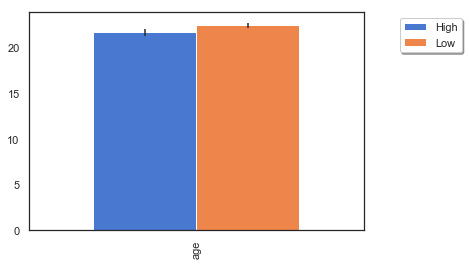

              age
gender group     
female High    15
       Low     15
male   High    14
       Low     15


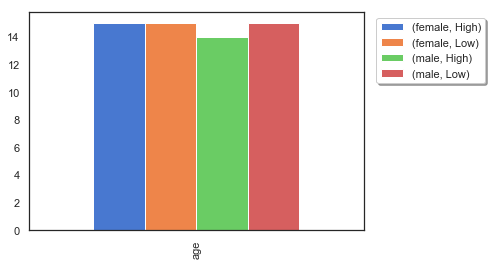

In [178]:
df_bygroup_basicinfor = opt_all[['gender','age','group']].groupby(['group']).mean()
y_err_bd = opt_all[['gender','age','group']].groupby(['group']).sem()
df_bygroup_basicinfor = df_bygroup_basicinfor.T
y_err_bd = y_err_bd.T

df_bygroup_basicinfor.plot(kind = 'bar',yerr = y_err_bd,width=0.8,style=['r','b'])#yerr = y_err_v,
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),ncol=1,fancybox=True,shadow=True)
#ylabel('bd')
show()

#print(opt_all[['gender','group']])
df_bygroup_basicinfor = opt_all[['age','gender','group']].groupby(['gender','group']).count()/2
print(df_bygroup_basicinfor)
#y_err_bd = opt_all[['gender','group']].groupby(['group']).sem()
df_bygroup_basicinfor = df_bygroup_basicinfor.T
#y_err_bd = y_err_bd.T

df_bygroup_basicinfor.plot(kind = 'bar',width=0.8,style=['r','b'])#yerr = y_err_v,
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),ncol=1,fancybox=True,shadow=True)
#ylabel('bd')
show()

**Plot scale scores between groups**

In [179]:
df = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all','group']]
df = df.drop_duplicates()
# color_list = ['rgba(93, 164, 214, 0.5)', 'rgba(93, 164, 214, 1)',  
#               'rgba(44, 160, 101, 0.5)', 'rgba(44, 160, 101, 1)',  
#               'rgba(255, 65, 54, 0.5)', 'rgba(255, 65, 54, 1)',  
#               'rgba(207, 114, 255, 0.5)','rgba(207, 114, 255, 1)',  
#               'rgba(127, 96, 0, 0.5)','rgba(127, 96, 0, 1)',  
#               'rgba(255, 165, 0,0.5)','rgba(255, 165, 0,1)',  
#               'rgba(255, 20, 147,0.5)','rgba(255, 20, 147,1)']
color_list = ['rgba(93, 164, 214, 5)', 'rgba(93, 214, 214, 1)',  
              'rgba(44, 160, 101, 5)', 'rgba(44, 210, 101, 1)',  
              'rgba(255, 65, 54, 5)', 'rgba(255, 115, 54, 1)',  
              'rgba(207, 114, 255, 5)','rgba(207, 164, 255, 1)',  
              'rgba(127, 96, 0, 5)','rgba(127, 146, 0, 1)',  
              'rgba(255, 165, 0,5)','rgba(255, 215, 0,1)',  
              'rgba(255, 20, 147,5)','rgba(255, 70, 147,1)']
scale_list = ['LSHS_total','LSHS_total','LSHS_AVH','LSHS_AVH','HPSV_all','HPSV_all','RAHQ_all','RAHQ_all',  
              'QPE_severity','QPE_severity','TAI_all','TAI_all','BDI_all','BDI_all']
group_list = ['High','Low']*7
df_gls = pd.DataFrame({'gls':group_list,
                       'sls':scale_list,
                       'cls':color_list})
data = [
            {
                'y': df[df['group']==group][clms],
                'type': 'box', 
                'boxpoints':'all',
                #'fillcolor':
                'marker': dict(color = df_gls[(df_gls['gls']==group)&(df_gls['sls']==clms)]['cls'].values[0]),
                'boxmean':'sd',
                'name': clms + '_' + group
            } 
                for clms in ['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all']
            for group in ['High','Low']
        ]
iplot(Figure(data=Data(data),layout = Layout(showlegend=False)))
#py.image.save_as(Figure(data=Data(data)), filename='a-simple-plot.jpeg')

**Calculate difference of scale scores between groups**

In [180]:
# get a list of all columns in the dataframe without the Group column
df = opt_all[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity','TAI_all','BDI_all','group']]
df = df.drop_duplicates()
column_list = [x for x in df.columns if x != 'group']
# create an empty dictionary
t_test_results = {}
# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.group== 'High')[column].dropna()
    group2 = df.where(df.group== 'Low')[column].dropna()
    print group1.count(),group2.count()
    # add the output to the dictionary 
    t_test_results[column] = ttest_ind(group1,group2)
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df

29 30
29 30
26 25
26 25
22 18
26 25
26 25


,statistic,pvalue
HPSV_all,3.598625,7.437606e-04
LSHS_AVH,13.358018,3.341900e-19
RAHQ_all,0.725479,4.716092e-01
BDI_all,3.410852,1.305602e-03
QPE_severity,1.418063,1.643215e-01
TAI_all,3.137979,2.878157e-03
LSHS_total,13.426356,2.676876e-19


<font face="Arial" size=6 color=#0099ff>  7.Plot bar graph and do anova and t-test statistics for RT and ACC. </font>

**Plot acc by conditon and group**

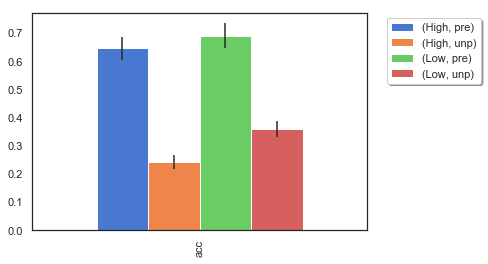

In [181]:
# remove subjects with very high fa, let's say more than 40
opt_all = opt_all[~opt_all.index.isin(opt_all[opt_all['fa']>40].index)]
df_bygroup_acc = opt_all[['acc','group','condition']].groupby(['group','condition']).mean()
y_err_acc = opt_all[['acc','group','condition']].groupby(['group','condition']).sem()
df_bygroup_acc = df_bygroup_acc.T
y_err_acc = y_err_acc.T

df_bygroup_acc.plot(kind = 'bar',yerr = y_err_acc,width=0.8,style=['r--','r','b--','b'])#yerr = y_err_v,
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),ncol=1,fancybox=True,shadow=True)
#ylabel('acc')
show()

In [182]:
#print opt_all
opt_all_tmp = opt_all.copy()
opt_all_tmp.reset_index(inplace=True)
sublist_all = opt_all_tmp[['Subject','group']].drop_duplicates()
sublist_paired = pd.read_table('Test_Preproc_GHY_SE.txt',header=None)
#?pd.read_table
sublist_paired.columns=['DNA_No','DNA_format_No']
sublist_paired['DNA_No'] = sublist_paired['DNA_No'].apply(lambda x: int(x[4:]))
sublist_paired = sublist_paired.rename(columns={'DNA_No':'Subject'})
sublist_FA40_all = sublist_all.set_index('Subject').join(sublist_paired.set_index('Subject'))
sublist_FA40_all[sublist_FA40_all.group=='High']['DNA_format_No'].to_csv('sublist_high_all.txt',index=False)
sublist_FA40_all[sublist_FA40_all.group=='Low']['DNA_format_No'].to_csv('sublist_low_all.txt',index=False)

**ANOVA for ACC**


<font face="Arial" size=5 color=#DC143C> tips: </font>
1. organize the data in the format requred by R fomula
2. use rpy2 interface to use R
3. use pivot to transform long format into wide format data, then save csv data to check statistic by using JASP.

In [183]:
df_se_pra = opt_all.copy()
df_se_pra.reset_index(inplace=True)
for bd_val in ['acc']:
    print('This is anova for %s:') %(bd_val)
    df_bd_val = df_se_pra[['Subject','group','condition',bd_val]]#

    df_bd_val = df_bd_val.drop_duplicates()
    # remove all subjects including na
    sublist_na = df_bd_val['Subject'][df_bd_val.iloc[:,-1].isna()].values
    df_bd_val = df_bd_val[~df_bd_val['Subject'].isin(sublist_na)]
    #print df_bd_val
#     sublist_bls = df[df.duplicated(keep='first')]['Subject'].values
#     df_bd_val = df_bd_val[df_bd_val['Subject'].isin(sublist_bls)]    
    #df2=df_bd_val.pivot(index='Subject', columns='condition', values='rt')
    
    r_df_bd_val = pandas2ri.py2ri(df_bd_val) 
    #print(r_df_bd_val)
    if bd_val == 'acc':
            %R -i r_df_bd_val r_df_bd_val$Subject <-factor(r_df_bd_val$Subject);\
            aov_group_conditon <- aov(acc ~ group*condition + Error(Subject/condition), data=r_df_bd_val);\
            print(summary(aov_group_conditon));print(model.tables(aov_group_conditon, "means"))
   
    # tranform data from long format into wide format. 
    df2=df_bd_val.pivot(index='Subject', columns='condition', values='acc')
    df2 = df2.join(df_bd_val[df_bd_val.condition=='pre'][['Subject','group']].set_index('Subject'))
    #print df2
    df2.to_csv('df_acc4anova.csv')

This is anova for acc:



Error: Subject
          Df Sum Sq Mean Sq F value Pr(>F)  
group      1 0.1665 0.16648   3.833 0.0559 .
Residuals 50 2.1719 0.04344                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Subject:condition
                Df Sum Sq Mean Sq F value Pr(>F)    
condition        1  3.569   3.569  157.19 <2e-16 ***
group:condition  1  0.033   0.033    1.46  0.233    
Residuals       50  1.135   0.023                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Tables of means
Grand mean
          
0.4810897 

 group 
      High     Low
     0.444  0.5243
rep 56.000 48.0000

 condition 
        pre     unp
     0.6663  0.2958
rep 52.0000 52.0000

 group:condition 
      condition
group  pre    unp   
  High  0.646  0.242
  rep  28.000 28.000
  Low   0.690  0.358
  rep  24.000 24.000


**t-test for ACC to check interaction pattern (simple effect)**

In [184]:
for con in ['pre','unp']:
    df = opt_all[['acc','group','condition']]
    df = df[df['condition']==con][['acc','group']]
    #print(df)
    column_list = [x for x in df.columns if x != 'group']
    # create an empty dictionary
    t_test_results = {}
    # loop over column_list and execute code explained above
    for column in column_list:
        group1 = df.where(df.group== 'High').dropna()[column]
        group2 = df.where(df.group== 'Low').dropna()[column]
        print group1.count(),group2.count()
        # add the output to the dictionary 
        #print(group1,group2)
        t_test_results[column] = ttest_ind(group1,group2)
    results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
    results_df.columns = ['statistic','pvalue']
    print con,'\n',results_df

28 24
pre 
     statistic    pvalue
acc  -0.740434  0.462499
28 24
unp 
     statistic   pvalue
acc  -2.981722  0.00442


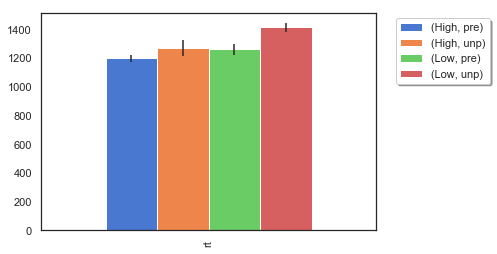

In [185]:
df_bygroup_rt = opt_all[['rt','group','condition']].groupby(['group','condition']).mean()
y_err_rt = opt_all[['rt','group','condition']].groupby(['group','condition']).sem()
df_bygroup_rt = df_bygroup_rt.T
y_err_rt = y_err_rt.T

df_bygroup_rt.plot(kind = 'bar',yerr = y_err_rt,width=0.8,style=['r--','r','b--','b'])#yerr = y_err_v,
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1),ncol=1,fancybox=True,shadow=True)
#ylabel('acc')
show()

In [186]:
df_se_pra = opt_all.copy()
df_se_pra.reset_index(inplace=True)
for bd_val in ['rt']:
    print('This is anova for %s:') %(bd_val)
    df_bd_val = df_se_pra[['Subject','group','condition',bd_val]]#
    df_bd_val = df_bd_val.drop_duplicates()
    # remove all subjects including na
    sublist_na = df_bd_val['Subject'][df_bd_val.iloc[:,-1].isna()].values
    df_bd_val = df_bd_val[~df_bd_val['Subject'].isin(sublist_na)]
#     sublist_bls = df[df.duplicated(keep='first')]['Subject'].values
#     df_bd_val = df_bd_val[df_bd_val['Subject'].isin(sublist_bls)]    
    #df2=df_bd_val.pivot(index='Subject', columns='condition', values='rt')
    df_bd_val.to_csv('tmp.csv')
    r_df_bd_val = pandas2ri.py2ri(df_bd_val) 
     #print(r_df_bd_val)
    if bd_val == 'rt':
        %R -i r_df_bd_val r_df_bd_val$Subject <-factor(r_df_bd_val$Subject);aov_group_conditon <- aov(rt ~ group*condition + Error(Subject/condition), data=r_df_bd_val);print(summary(aov_group_conditon));print(model.tables(aov_group_conditon, "means"))
    

This is anova for rt:



Error: Subject
          Df  Sum Sq Mean Sq F value Pr(>F)  
group      1  272681  272681   4.681 0.0353 *
Residuals 50 2912554   58251                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Subject:condition
                Df Sum Sq Mean Sq F value   Pr(>F)    
condition        1 299819  299819  16.429 0.000176 ***
group:condition  1  43203   43203   2.367 0.130198    
Residuals       50 912447   18249                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Tables of means
Grand mean
         
1282.805 

 group 
    High  Low
    1235 1338
rep   56   48

 condition 
     pre  unp
    1229 1336
rep   52   52

 group:condition 
      condition
group  pre    unp   
  High 1200.6 1270.2
  rep    28.0   28.0
  Low  1262.4 1413.8
  rep    24.0   24.0


In [187]:
for con in ['pre','unp']:
    df = opt_all[['rt','group','condition']]
    df = df[df['condition']==con][['rt','group']]
    #print(df)
    column_list = [x for x in df.columns if x != 'group']
    # create an empty dictionary
    t_test_results = {}
    # loop over column_list and execute code explained above
    for column in column_list:
        group1 = df.where(df.group== 'High').dropna()[column]
        group2 = df.where(df.group== 'Low').dropna()[column]
        print group1.count(),group2.count()
        # add the output to the dictionary 
        #print(group1,group2)
        t_test_results[column] = ttest_ind(group1,group2)
    results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
    results_df.columns = ['statistic','pvalue']
    print con, '\n',results_df

28 24
pre 
    statistic    pvalue
rt  -1.422349  0.161134
28 24
unp 
    statistic    pvalue
rt  -2.262021  0.028075


In [188]:
for bd_val  in ['acc','rt']:
    df = opt_all[[bd_val,'group','condition']]
    df = df.drop_duplicates()
    color_list = ['rgba(255, 65, 54, 5)', 'rgba(255, 115, 54, 1)',  
                  'rgba(44, 160, 101, 5)', 'rgba(44, 210, 101, 1)']
    scale_list = ['unp','pre','unp','pre']
    group_list = ['High']*2+['Low']*2
    df_gls = pd.DataFrame({'gls':group_list,
                           'sls':scale_list,
                           'cls':color_list})
    #print(df_gls)
#     for group in ['High','Low']:
#         for clms in ['unp','pre']:
#             print(group,clms)
            #print(df_gls[(df_gls['gls']==group)&(df_gls['sls']==clms)]['cls'].values[0])

    data = [
                {
                    'y': df[(df['group']==group)&(df['condition']==clms)][bd_val],
                    'type': 'box', 
                    'boxpoints':'all',
                    #'fillcolor':
                    'marker': dict(color = df_gls[(df_gls['gls']==group)&(df_gls['sls']==clms)]['cls'].values[0]),
                    'boxmean':'sd',
                    'name': clms + '_' + group
                }   
                    for group in ['High','Low']
                for clms in ['unp','pre']
            ]
    iplot(Figure(data=Data(data),layout = Layout(width=500,height=500,title=bd_val,showlegend=True)))


<font face="Arial" size=5 color=#DC143C> use dPrime function to calulate singal detection theroy measures, d,beta,c,Ad. </font> 

In [189]:
from __future__ import division # Not neccessary in Python 3 and later
from scipy.stats import norm
from math import exp,sqrt
Z = norm.ppf
 
def dPrime(hits, misses, fas, crs):
    # Floors an ceilings are replaced by half hits and half FA's
    halfHit = 0.5/(hits+misses)
    halfFa = 0.5/(fas+crs)
 
    # Calculate hitrate and avoid d' infinity
    hitRate = hits/(hits+misses)
    if hitRate == 1: hitRate = 1-halfHit
    if hitRate == 0: hitRate = halfHit
 
    # Calculate false alarm rate and avoid d' infinity
    faRate = fas/(fas+crs)
    if faRate == 1: faRate = 1-halfFa
    if faRate == 0: faRate = halfFa
 
    # Return d', beta, c and Ad'
    out = {}
    out['d'] = Z(hitRate) - Z(faRate)
    out['beta'] = exp((Z(faRate)**2 - Z(hitRate)**2)/2)
    out['c'] = -(Z(hitRate) + Z(faRate))/2
    out['Ad'] = norm.cdf(out['d']/sqrt(2))
    return out
dPrime(0.8,0.2,0.7,0.3)

{'Ad': 0.588741533169061,
 'beta': 0.805199503739556,
 'c': -0.6830108731404775,
 'd': 0.31722072086487363}

In [190]:
#opt_all = opt_all.set_index('Subject')
opt_all['fa'] = opt_all['fa'].apply(lambda x:x/60)
acc_2cond = opt_all[['group','condition','fa','acc']].groupby(['Subject'])['acc'].mean()
opt_all.reset_index(inplace=True) 
opt_all =opt_all.set_index(['Subject'])
opt_all = opt_all.join(acc_2cond,rsuffix='_2cond')
opt_all.reset_index(inplace=True) 
opt_all =opt_all.set_index(['Subject'])
opt_all.reset_index(inplace=True) 
df_dPrime = [dPrime(opt_all['acc_2cond'][idx],1-opt_all['acc_2cond'][idx],opt_all['fa'][idx],1-opt_all['acc_2cond'][idx]) for idx in opt_all.index]
opt_all = opt_all.join(pd.DataFrame(df_dPrime))
opt_all = opt_all.set_index('Subject')

In [191]:
#opt_all[['group','condition','d','c','Ad','beta','fa']].to_csv('tmp.csv')
opt_all.reset_index(inplace=True)
#opt_all = opt_all[opt_all['fa']<=40/60]

In [192]:
# themes =  cf.getThemes()
# print(themes)
# cf.set_config_file(theme=themes[6])
#print(opt_all)
bd_str = 'fa'
#opt_all.to_csv('tmp1.csv')
sublist_na = opt_all['Subject'][opt_all.loc[:,bd_str].isna()].values
df_se_pra_nona = opt_all[~opt_all['Subject'].isin(sublist_na)]
df_tmp = df_se_pra_nona[(df_se_pra_nona['condition']=='unp')][['Subject','group','d','c','Ad','beta','fa']]
df_tmp = df_tmp.drop_duplicates()
df_tmp.to_csv('tmp.csv')
data = [
            {
                'y': df_tmp[(df_tmp['group']==group)][bd_str],
                'type': 'box', 
                'boxpoints':'all',
                'name': bd_str + '_' + str(group)
            } 
                for bd_str in  ['d','c','Ad','beta']
            for group in ['High','Low']
        ]
iplot(Figure(data=Data(data)))

**correlation between scales score and behaviorial measurements**

                LSHS_total      LSHS_AVH  HPSV_all  RAHQ_all  QPE_severity
Subject       4.010982e-03  1.303069e-02  0.649682  0.732478           1.0
LSHS_total    0.000000e+00  3.519341e-22  0.001042  0.985145           1.0
LSHS_AVH      3.519341e-22  0.000000e+00  0.000182  0.554945           1.0
HPSV_all      1.042004e-03  1.824442e-04  0.000000  0.288445           1.0
RAHQ_all      9.851452e-01  5.549448e-01  0.288445  0.000000           1.0
QPE_severity  1.000000e+00  1.000000e+00  1.000000  1.000000           1.0
TAI_all       5.995703e-03  3.040545e-02  0.134321  0.258810           1.0
BDI_all       5.665099e-03  1.849250e-02  0.005577  0.298832           1.0
d             3.370288e-02  1.609965e-02  0.193646  0.825699           1.0
Ad            2.973522e-02  1.310381e-02  0.154933  0.821111           1.0
c             3.346405e-01  1.496326e-01  0.739571  0.071356           1.0
beta          2.581469e-01  3.338306e-01  0.539916  0.036838           1.0
fa            1.836095e-0

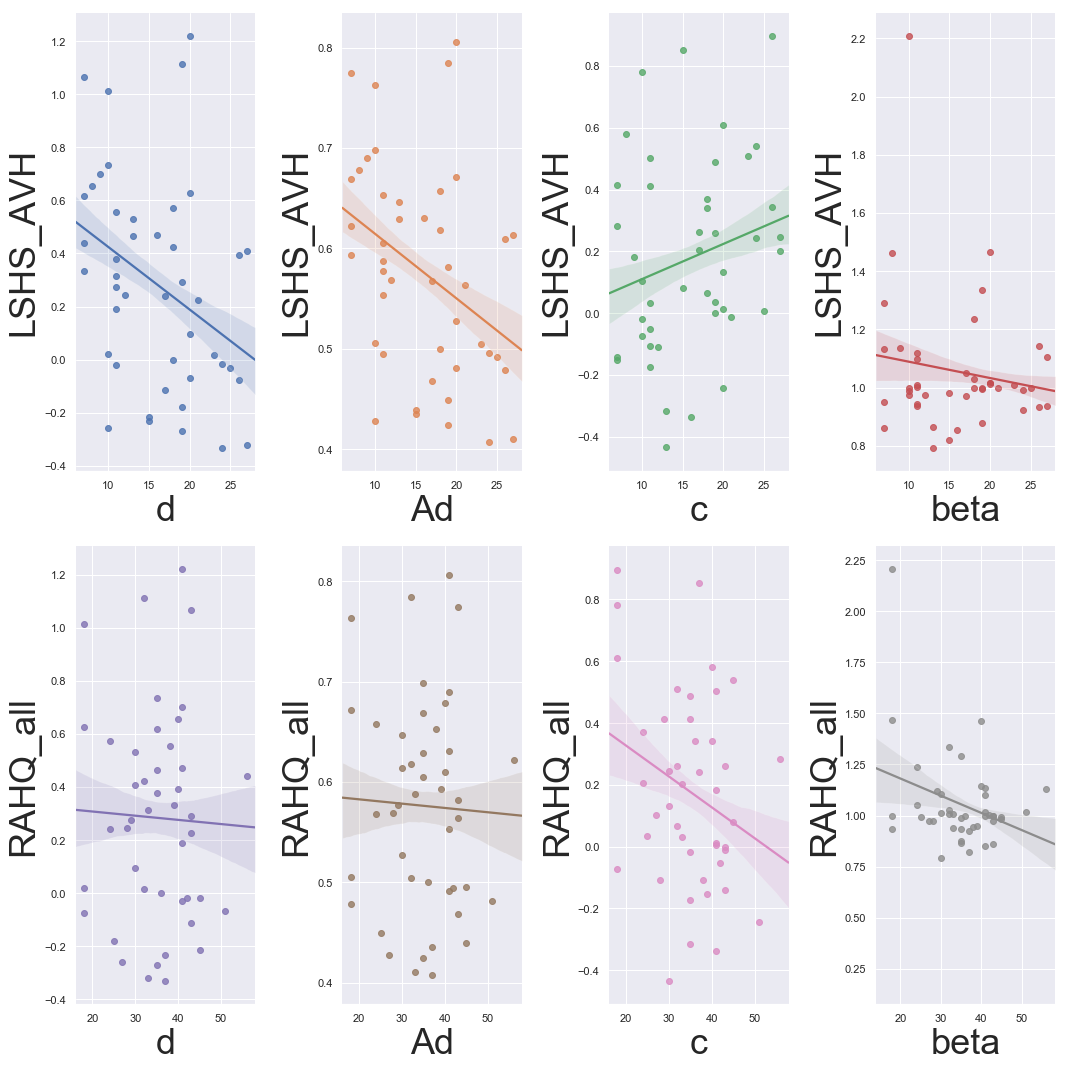

In [193]:
#%debug
#bd_str = 'LSHS_AVH'

#opt_all.to_csv('tmp1.csv')
sublist_na = opt_all['Subject'][(opt_all.loc[:,'BDI_all'].isna())|(opt_all.loc[:,'LSHS_AVH'].isna())].values
df_se_pra_nona = opt_all[~opt_all['Subject'].isin(sublist_na)]
df_tmp = df_se_pra_nona[(df_se_pra_nona['condition']=='unp')][['Subject','LSHS_total','LSHS_AVH',  
                                                               'HPSV_all','RAHQ_all','QPE_severity',  
                                                               'TAI_all','BDI_all','d',  
                                                               'Ad','c','beta','fa']]  
                                                               
df = df_tmp.drop_duplicates()
df.to_csv('tmp.csv')
from scipy.stats import pearsonr
#print(pearsonr(df['LSHS_total'],df['d']))
r_p = [pearsonr(df[cls1],df[cls2]) for cls1 in df.columns for cls2 in df.columns]
r, p = zip(*r_p)
bd_names = ['Subject','LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all',  
            'QPE_severity','TAI_all','BDI_all','d','Ad','c','beta','fa']
r = pd.DataFrame(np.array(r).reshape((13,13)),columns=bd_names,index = bd_names)
p = pd.DataFrame(np.array(p).reshape((13,13)),columns=bd_names,index = bd_names)
print(p[['LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all','QPE_severity']])
#print(p)


import seaborn as sns; sns.set(color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(2, 4, figsize=(15, 15))
sns.despine(left=True)
cnt1 = 0
for clms1 in ['LSHS_AVH','RAHQ_all']:
    cnt2 = 0
    for clms2 in ['d','Ad','c','beta']:#,'fa'
        b= sns.regplot(x=clms1, y=clms2, data=df,ci=68,ax=axes[cnt1, cnt2])
        #sns.set_xlabel("X Label",fontsize=30)
        b.set_xlabel(clms2,fontsize=18*2)
        b.set_ylabel(clms1,fontsize=18*2)
        cnt2 +=1
    cnt1 += 1 
#plt.setp(axes, yticks=[])
plt.tight_layout()
plt.savefig('correlation_irt_avh.jpeg')

In [194]:
# get a list of all columns in the dataframe without the Group column
df = opt_all[(opt_all['condition']=='unp')][['group','d','c','Ad','beta','fa']]
df.to_csv('tmp.csv')
column_list = [x for x in df.columns if x != 'group']
# create an empty dictionary
t_test_results = {}
# loop over column_list and execute code explained above
for column in column_list:
    group1 = df.where(df.group== 'High').dropna()[column]
    group2 = df.where(df.group== 'Low').dropna()[column]
    # add the output to the dictionary 
    t_test_results[column] = ttest_ind(group1,group2)
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df

,statistic,pvalue
beta,-0.621179,0.537304
fa,1.696972,0.095919
c,0.710913,0.480442
d,-2.250947,0.028817
Ad,-2.355693,0.022451


In [195]:
opt_all_tmp = opt_all[(opt_all['condition']=='unp')][['Subject','group','d','c','Ad','beta','fa',
                                        'LSHS_total','LSHS_AVH','HPSV_all','RAHQ_all',
                                         'QPE_severity','TAI_all','BDI_all',]]
# %store opt_all_tmp
# del opt_all_tmp

<font face="Arial" size=6 color=#0099ff>  8.Advanced machine learning approach. </font>

## To demostrate how easy to implement a machine learning model in python 

In [196]:
opt_all_tmp.columns

Index([     u'Subject',        u'group',            u'd',            u'c',
                 u'Ad',         u'beta',           u'fa',   u'LSHS_total',
           u'LSHS_AVH',     u'HPSV_all',     u'RAHQ_all', u'QPE_severity',
            u'TAI_all',      u'BDI_all'],
      dtype='object')

In [197]:
from sklearn.model_selection import train_test_split
# selected_features = [u'd',u'c',u'Ad',u'beta',u'fa',u'LSHS_total',u'LSHS_AVH',\
#                      u'HPSV_all',u'RAHQ_all', u'QPE_severity',u'TAI_all',u'BDI_all']
selected_features = [u'd',u'c',u'Ad',u'beta',u'fa',u'LSHS_total',u'HPSV_all',u'RAHQ_all', u'QPE_severity',u'TAI_all',u'BDI_all']
X = opt_all_tmp[selected_features]
y = opt_all_tmp['group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [198]:
print opt_all_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 103
Data columns (total 14 columns):
Subject         52 non-null int64
group           52 non-null object
d               52 non-null float64
c               52 non-null float64
Ad              52 non-null float64
beta            52 non-null float64
fa              52 non-null float64
LSHS_total      52 non-null float64
LSHS_AVH        52 non-null float64
HPSV_all        44 non-null float64
RAHQ_all        44 non-null float64
QPE_severity    36 non-null float64
TAI_all         44 non-null float64
BDI_all         44 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 8.6+ KB
None


In [199]:
opt_all_tmp['HPSV_all'].fillna(X_train['HPSV_all'].mean(), inplace=True)
opt_all_tmp['RAHQ_all'].fillna(X_train['RAHQ_all'].mean(), inplace=True)
opt_all_tmp['QPE_severity'].fillna(X_train['QPE_severity'].mean(), inplace=True)
opt_all_tmp['TAI_all'].fillna(X_train['TAI_all'].mean(), inplace=True)
opt_all_tmp['BDI_all'].fillna(X_train['BDI_all'].mean(), inplace=True)

In [200]:
print opt_all_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 103
Data columns (total 14 columns):
Subject         52 non-null int64
group           52 non-null object
d               52 non-null float64
c               52 non-null float64
Ad              52 non-null float64
beta            52 non-null float64
fa              52 non-null float64
LSHS_total      52 non-null float64
LSHS_AVH        52 non-null float64
HPSV_all        52 non-null float64
RAHQ_all        52 non-null float64
QPE_severity    52 non-null float64
TAI_all         52 non-null float64
BDI_all         52 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 8.6+ KB
None


In [201]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()

# from sklearn.model_selection import cross_val_score

# cross_val_score(rfc, X_train, y_train, cv=5).mean()

In [209]:
# from xgboost import XGBClassifier

xgbc = XGBClassifier()

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
cross_val_score(xgbc, X_train, y_train, cv=5).mean()

0.9464285714285715

In [203]:
# rfc.fit(X_train,y_train)
# rfc.feature_importances_

In [204]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [205]:
len([range(10)])

1

In [206]:
np.array([0.])
#np.concatenate((np.array([0.]), cdf, np.array([1.])))

array([0.])

In [207]:
np.random.randn(len(range(10)))*(2**-1)

array([ 0.6976438 ,  0.23090232, -0.56848307,  0.85193869, -0.75642307,
       -0.55573395,  1.39417119,  1.14141322,  0.32040853,  0.00993379])

In [208]:
xgbc.fit(X_train,y_train)
xgbc.feature_importances_

array([0.01587302, 0.15873016, 0.        , 0.        , 0.        ,
       0.63492066, 0.        , 0.12698413, 0.        , 0.        ,
       0.06349207], dtype=float32)